# Lecture 4 worksheet solutions

### Problem 1 (True/False)

Indicate whether each of the following statements is True or False.

1. It is possible to control the FWER of an infinite sequence of hypothesis tests, while still being able to detect non-null hypotheses.

**Answer: TRUE**. Let $E_i$ be the event that the $i$-th $p$-value is a false positive. Then by the union bound,
$$\mathbb{P}\left\{ \text{at least one FP} \right\} = \mathbb{P}\left\{ \cup_{i=1}^\infty E_i \right\} \leq \sum_{i=1}^\infty \mathbb{P}(E_i).$$

Furthermore, recall that if the $i$-th hypothesis is null, $\mathbb{P}(E_i) = \alpha_i$. As such, we just need to select thresholds $\alpha_i$ so that $\sum_{i=1}^\infty \alpha_i \leq \alpha$. For instance, we can select $\alpha_i = \alpha\cdot 2^{-i}$. For any index $i$, since this threshold is larger than $0$, there is still a chance of rejecting the $i$-th hypothesis if it turns out to be non-null.

2. ROC curves illustrate the tradeoff between TPR and FDR.

**Answer: FALSE**. They illustrate the tradeoff between TPR and F**P**R.

3. Under the LORD algorithm, every null hypothesis has an equal probability of being rejected.

**Answer: FALSE**. The LORD algorithm uses different thresholds for different null hypotheses.

### Problem 2 (ROC curves)

1. An ROC curve is plotted for a model with the following TPR and FPR values for 4 different thresholds. Compute the area under the curve (AU-ROC).

In [1]:
tpr = [0, 0.8, 0.9, 1]
fpr = [0, 0.2, 0.4, 1]

**Answer:**

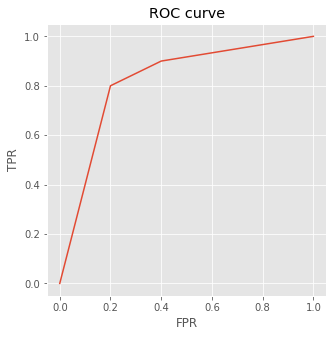

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve")
plt.show()

Finding area using trapezoid rule, we have

In [3]:
area = (0 + 0.8)/2*0.2 + (0.8+0.9)/2*0.2 + (0.9+1)/2*0.6
area

0.8200000000000001

Alternatively use the sklearn function to compute the trapezoid rule automatically.

In [4]:
from sklearn.metrics import auc

In [5]:
auc(fpr, tpr)

0.8200000000000001

2. Does it make sense to plot an ROC curve for a 1-nearest neighbor classifier? Why or why not?

**Answer:** 1-nearest neighbors do not give a score function, so we cannot plot an ROC curve.

3. Suppose we have a data set for which the class labels are pure noise. More precisely, suppose that the class labels $Y_1,Y_2,\ldots,Y_n$ are independent Bernoulli random variables with $p=1/2$, and are completely independent of the feature data $X$. Nonetheless, we fit a model to the training set. What is the model's AU-ROC on the test set (approximately)? What if p = 0.2?

**Answer:** The ROC curve is going to be a straight diagonal line from 0 to 1 (with AUC = 0.5). This is because the labels are *independent* of the scores, so at any given threshold, the same fraction of "positive" and "negative" examples will have scores beneath the threshold. This does depend on the choice of $p$.

Mathematically, let $S$ denote the score, then over the test set, for every threshold $\tau$

$$
\text{TPR}(\tau) = \mathbb{P}\{S>\tau|Y=1\} = \mathbb{P}\{S>\tau|Y=0\} = \text{FPR}(\tau).
$$

The left and right equalities hold by definition, and the middle one by independence of $S$ and $Y$.

*Remark: This shows that 0.5 is a baseline for ROC scores. Any model that has close to 0.5 AUC is bad.*

4. We want to construct a model that uses [clinical data to predict whether or not a child has an intra-abdominal injury](https://www.pecarn.org/publications/documents/IAImainpredictionrulepaper.pdf). Such injuries are rare but their consequences can be devestating. What do you think is the problem of using AU-ROC as a way to compare models for this dataset?

**Answer:** In such a situation, false negatives are a lot more costly than false positives. As such, we do not care about most of the ROC curve, but instead only the region that has high TPR. Computing the area aggregates information about region of the curve that we don't care about.

### Problem 3 (Tower property)

The goal of this exercise is to get a feel for the tower property using some simple calculations. Consider the following data set of cats.

In [6]:
import numpy as np
import pandas as pd

cats = pd.DataFrame({"Name" : ["Nugget", "Bella", "Max", "Biscuits", "Simba", "Frieda"],
                     "Gender" : ["F", "F", "M", "M", "M", "F"],
                     "Coat" : ["Tabby", "Black", "Black", "Tabby", "Tabby", "Tabby"],
                     "Weight" : [11.3, 6.8, 8.1, 9.5, 8.8, 7.6]})
cats

,Name,Gender,Coat,Weight
0,Nugget,F,Tabby,11.3
1,Bella,F,Black,6.8
2,Max,M,Black,8.1
3,Biscuits,M,Tabby,9.5
4,Simba,M,Tabby,8.8
5,Frieda,F,Tabby,7.6


1. Suppose we draw a cat at random, and let $G$, $C$, and $W$ denote the gender, coat and weight of the cat respectively. What is the average cat weight $\mathbb{E}[W]$?

**Answer:**

In [7]:
avg_weight = cats["Weight"].mean()
avg_weight

8.683333333333334

2.  Compute $\mathbb{E}[W|G=F]$ and $\mathbb{E}[W|G=M]$, then show that $\mathbb{E}\left[\mathbb{E}[W|G]\right] = \mathbb{E}[W]$.

**Answer:**

In [8]:
avg_weight_f = cats[cats["Gender"] == "F"]["Weight"].mean()
avg_weight_f

8.566666666666668

In [9]:
avg_weight_m = cats[cats["Gender"] == "M"]["Weight"].mean()
avg_weight_m

8.8

In [10]:
avg_weight_f * 3/6 + avg_weight_m * 3/6 == avg_weight

True

3. Now compute $\mathbb{E}[W|C=\text{Tabby}]$ and $\mathbb{E}[W|C=\text{Black}]$, then show that $\mathbb{E}\left[\mathbb{E}[W|C]\right] = \mathbb{E}[W]$.

In [11]:
avg_weight_t = cats[cats["Coat"] == "Tabby"]["Weight"].mean()
avg_weight_t

9.3

In [12]:
avg_weight_b = cats[cats["Coat"] == "Black"]["Weight"].mean()
avg_weight_b

7.449999999999999

In [13]:
avg_weight_t * 4/6 + avg_weight_b * 2/6 == avg_weight

True